In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import h5py

import time, os, re, sys

from sklearn import utils
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split, ParameterGrid

# K-fold validation
from sklearn.model_selection import RepeatedStratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Scoring
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import imblearn
from sklearn.metrics import accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pickle

with open(r'../../Results/gr_Adaboost.pkl', 'rb') as file:
 
    results = pickle.load(file)
 
    
df = pd.DataFrame(results.cv_results_)

print(df.columns)
df.tail()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algorithm', 'param_learning_rate', 'param_n_estimators',
       'params', 'split0_test_f1_macro', 'split1_test_f1_macro',
       'split2_test_f1_macro', 'split3_test_f1_macro', 'split4_test_f1_macro',
       'split5_test_f1_macro', 'split6_test_f1_macro', 'split7_test_f1_macro',
       'split8_test_f1_macro', 'split9_test_f1_macro', 'mean_test_f1_macro',
       'std_test_f1_macro', 'rank_test_f1_macro', 'split0_test_Accuracy',
       'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy',
       'split4_test_Accuracy', 'split5_test_Accuracy', 'split6_test_Accuracy',
       'split7_test_Accuracy', 'split8_test_Accuracy', 'split9_test_Accuracy',
       'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy',
       'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC',
       'split3_test_AUC', 'split4_test_AUC', 'split5_test_AUC',
       'split6_test_AUC', 'split7_test_AU

c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
58     366.083164      2.180897         7.112134        0.267425   
59     490.533265      2.997486         9.746317        0.397066   
60     737.582529      5.329327        14.231676        0.613375   
61    1228.896116      2.969323        23.538954        0.751950   
62    1459.386648     17.690139        27.890142        0.750289   

   param_algorithm param_learning_rate param_n_estimators  \
58         SAMME.R                   5                150   
59         SAMME.R                   5                200   
60         SAMME.R                   5                300   
61         SAMME.R                   5                500   
62         SAMME.R                   5                600   

                                               params  split0_test_f1_macro  \
58  {'algorithm': 'SAMME.R', 'learning_rate': 5, '...               0.98743   
59  {'algorithm': 'SAMME.R', 'learning_rate': 5, '...               0.98743   
60  {'algorithm': 'SAMME.R', 'learning_rate': 5, '...               0.98743   
61  {'algorithm': 'SAMME.R', 'learning_rate': 5, '...               0.98743   
62  {'algorithm': 'SAMME.R', 'learning_rate': 5, '...               0.98743   

    split1_test_f1_macro  ...  split3_test_AUC  split4_test_AUC  \
58               0.98758  ...         0.989157         0.989836   
59               0.98758  ...         0.989157         0.989836   
60               0.98758  ...         0.989157         0.989836   
61               0.98758  ...         0.989118         0.989836   
62               0.98758  ...         0.989118         0.989836   

    split5_test_AUC  split6_test_AUC  split7_test_AUC  split8_test_AUC  \
58         0.988576         0.987923         0.988587         0.988954   
59         0.988458         0.987923         0.988548         0.988954   
60         0.988567         0.987833         0.988534         0.988954   
61         0.988301         0.987833         0.988467         0.988899   
62         0.988414         0.987833         0.988467         0.988899   

    split9_test_AUC  mean_test_AUC  std_test_AUC  rank_test_AUC  
58         0.988056       0.988481      0.000854             49  
59         0.988056       0.988453      0.000857             51  
60         0.988056       0.988454      0.000864             50  
61         0.988056       0.988409      0.000861             53  
62         0.988054       0.988420      0.000860             52  

[5 rows x 47 columns]

In [4]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_best = []
for metric in scoring:
    idx_best.append(df[f'rank_test_{metric}'].idxmin())
    
    
if idx_best.count(idx_best[0]) == len(idx_best):
    print("########## We have a winner! ##########")
    print("The best classificator is:")
    print(df.loc[idx_best[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]:5f}, std = {df['std_test_' + metric][1]:4f}")
else:
    print("Oh-oh there are more best estimators...")
    for i, met in zip(idx_best, scoring):
        print(f"Best classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]}, std = {df['std_test_' + metric][1]}")




Oh-oh there are more best estimators...
Best classificator for the metric f1_macro - idx 44
{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 600}
Scorer results:
- f1_macro --> Mean = 0.9875823876074245, std = 0.00010215266144984827
- Accuracy --> Mean = 0.9875842487836175, std = 0.00010210125873794951
- AUC --> Mean = 0.9881127849217158, std = 0.00012630083234986612
Best classificator for the metric Accuracy - idx 44
{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 600}
Scorer results:
- f1_macro --> Mean = 0.9875823876074245, std = 0.00010215266144984827
- Accuracy --> Mean = 0.9875842487836175, std = 0.00010210125873794951
- AUC --> Mean = 0.9881127849217158, std = 0.00012630083234986612
Best classificator for the metric AUC - idx 53
{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 600}
Scorer results:
- f1_macro --> Mean = 0.9875823876074245, std = 0.00010215266144984827
- Accuracy --> Mean = 0.9875842487836175, std = 0.00010210125873794951
- A

In [5]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_worst = []
for metric in scoring:
    idx_worst.append(df[f'rank_test_{metric}'].idxmax())
    
    
if idx_worst.count(idx_worst[0]) == len(idx_worst):
    print("########## We have a loser! ##########")
    print("The worst classificator is:")
    print(df.loc[idx_worst[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]:5f}, std = {df['std_test_' + metric][1]:4f}")
else:
    print("Oh-oh there are more worst estimators...")
    for i, met in zip(idx_worst, scoring):
        print(f"Worst classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]}, std = {df['std_test_' + metric][1]}")



Oh-oh there are more worst estimators...
Worst classificator for the metric f1_macro - idx 28
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 10}
Scorer results:
- f1_macro --> Mean = 0.9875823876074245, std = 0.00010215266144984827
- Accuracy --> Mean = 0.9875842487836175, std = 0.00010210125873794951
- AUC --> Mean = 0.9881127849217158, std = 0.00012630083234986612
Worst classificator for the metric Accuracy - idx 28
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 10}
Scorer results:
- f1_macro --> Mean = 0.9875823876074245, std = 0.00010215266144984827
- Accuracy --> Mean = 0.9875842487836175, std = 0.00010210125873794951
- AUC --> Mean = 0.9881127849217158, std = 0.00012630083234986612
Worst classificator for the metric AUC - idx 0
{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 1}
Scorer results:
- f1_macro --> Mean = 0.9875823876074245, std = 0.00010215266144984827
- Accuracy --> Mean = 0.9875842487836175, std = 0.00010210125873794951

In [5]:
dati = np.load("../Dataset/dati.npz")
X = dati["X"]
y = dati["y"]

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

# Applico la PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

thrEV = .95     # Soglia Explained Variance per pruning componenti

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature} features ")


# Pruno tenendo solo le prime componenti più informative
X_pruned = X_pca[:,:idxLastFeature]     # Pruno


To have 95.0 % of Explaied Variance, we need 7 features 


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.2, random_state=0)

In [9]:
idx = [idx_best[0], idx_best[2]]

y_pred = []
y_pred_proba = []

for i in idx:
    params = df.loc[i]['params']
    clf = AdaBoostClassifier(**params)
    clf = clf.fit(X_train, y_train)
    y_pred.append(clf.predict(X_test))
    y_pred_proba.append(clf.predict_proba(X_test)[:,1])


In [8]:
cf_matrix = []

for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix.append(metrics.confusion_matrix(y_test, y_pred[i]))
    accuracy        =   metrics.accuracy_score(y_test, y_pred[i])
    precision       =   metrics.precision_score(y_test, y_pred[i])
    recall          =   metrics.recall_score(y_test, y_pred[i])
    f1              =   metrics.f1_score(y_test, y_pred[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")


For idx = 456
-- accuracy = 0.9943
-- precision = 0.9906
-- recall = 0.9980
-- f1 = 0.9943
For idx = 332
-- accuracy = 0.9905
-- precision = 0.9830
-- recall = 0.9982
-- f1 = 0.9905


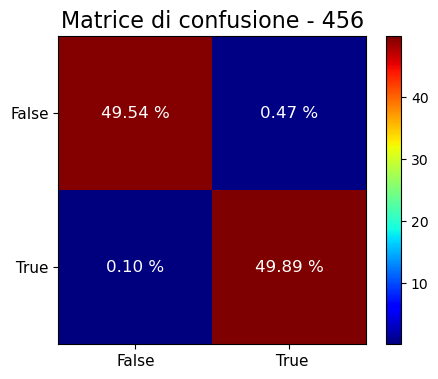

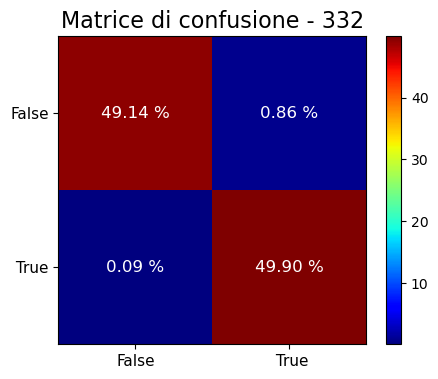

In [19]:
for i, mat in enumerate(cf_matrix):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100


    fig, ax = plt.subplots()
    fig.set_size_inches(5,4)

    # Plotto la matrice di covarianza
    im = ax.imshow(myConfMat, cmap = "jet", origin = "upper")

    ax.set_title(f"Matrice di confusione - {idx[i]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax.text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax.set_xticks((0,1))
    ax.set_xticklabels(['False',' True'], rotation='horizontal', fontsize=11)

    ax.set_yticks((0,1))
    ax.set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)

    # fig.savefig("../LATEX/FIGURE/41-conf-matrix.pdf", format = "pdf", bbox_inches = "tight")

    plt.show()

In [11]:
nrocstep = 100000                            # Numero punti per curva ROC
xROC = np.linspace(0,1,nrocstep)           # Vettore su cui interpolare curva ROC
yROC_lst = []
for i,y in enumerate(y_pred_proba):
    # *** ROC Curve ***

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y)

    # Creo un'interpolazione denza per miglior calcolo aree
    yROC = np.interp(xROC, fpr, tpr)
    yROC_lst.append(yROC)
    #myAuc = metrics.auc(fpr, tpr)
    myAUC = metrics.auc(xROC, yROC)
    print(f"{idx[i]} --> AUC = {myAUC}")


456 --> AUC = 0.9944254993720624
332 --> AUC = 0.9962166552048037


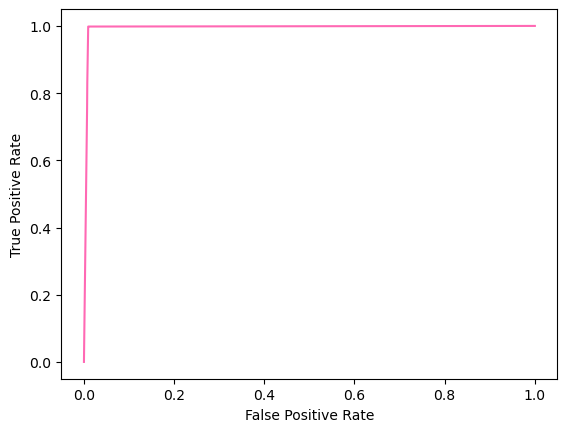

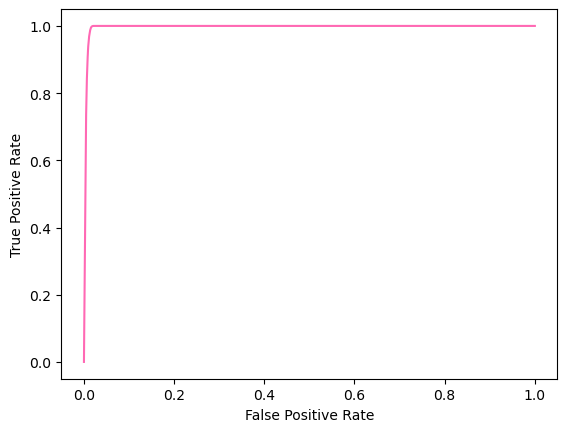

In [12]:
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

for i, yROC in enumerate(yROC_lst):

    #create ROC curve
    plt.plot(xROC,yROC, c  = "hotpink")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
